# Nguyễn Ngọc Đạt 11200745  DSEB62


## Bài 1: Cho bài toán XOR
- Implement thuật toán neural network để giải bài toán dùng Pytorch


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.optim as optim

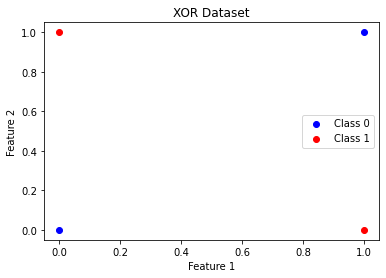

In [95]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

X_0 = X[y == 0]
X_1 = X[y == 1]


plt.scatter(X_0[:, 0], X_0[:, 1], c='blue', label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('XOR Dataset')
plt.legend()
plt.show()

In [96]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__() 
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() 
        self.output = nn.Linear(hidden_size,output_size)
    
    def forward(self, x):
        hidden = self.hidden(x)
        activated = self.relu(hidden)
        output = self.output(activated)
        return output 

In [97]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [98]:
input_size = 2
hidden_size = 16
output_size = 1

learning_rate = 0.001
epochs = 1000

network = NeuralNetwork(input_size, hidden_size, output_size)

In [99]:
network

NeuralNetwork(
  (hidden): Linear(in_features=2, out_features=16, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=16, out_features=1, bias=True)
)

In [100]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [101]:
def train_neural_network(network, optimizer, loss_fn, X, y, epochs):
    for epoch in range(epochs):
        optimizer.zero_grad() # Đặt gradient về 0

        # Feedforward
        outputs = network(X)

        loss = loss_fn(outputs, y)

        # Backpropagation 
        loss.backward()

        # Cập nhật các tham số của mạng
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

In [102]:
train_neural_network(network, optimizer, loss_fn, X, y, epochs)

Epoch 1/1000, Loss: 0.5420
Epoch 101/1000, Loss: 0.2677
Epoch 201/1000, Loss: 0.1526
Epoch 301/1000, Loss: 0.0872
Epoch 401/1000, Loss: 0.0509
Epoch 501/1000, Loss: 0.0295
Epoch 601/1000, Loss: 0.0159
Epoch 701/1000, Loss: 0.0075
Epoch 801/1000, Loss: 0.0029
Epoch 901/1000, Loss: 0.0010


In [103]:
X_test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_test = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

with torch.no_grad():
    outputs = network(X_test)
    predicted_labels = (outputs > 0.5).float()
    accuracy = (predicted_labels == y_test).float().mean()

print(f"Accuracy on test data: {accuracy.item():.2f}")

Accuracy on test data: 1.00


## Bài 2: Cho dataset MNIST
- Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch
- Chỉnh learning rate, vẽ đồ thị loss tương ứng.
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.


In [104]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784) #reshape the input to (-1, 784) cause we don't know the dim of input 
        # -1 size of the first dimension will be inferred from the other dimensions. 
        #In this case, the first dimension will be set to the number of elements in the tensor x
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [105]:
# gpu available ?
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [106]:
batch_size = 64 #train on batches of 64 examples at a time.
learning_rate = [0.001, 0.000000001, 1]
num_epochs = 10

In [107]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [108]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
val_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

In [109]:
num_train_samples = int(len(train_dataset) * 0.8)
num_val_samples = len(train_dataset) - num_train_samples

In [110]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [111]:
for data in train_loader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [112]:
x, y = data[0][0], data[1][0]

print(y)
#print(x)

tensor(0)


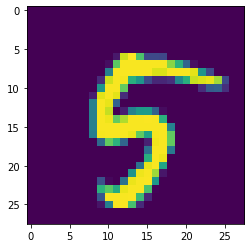

In [113]:
plt.imshow(data[0][2].view(28,28))
plt.show()

In [114]:
total = 0 
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in train_loader:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1 

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [115]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [116]:
model = NN()

# Define the loss function and optimizer
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Learning Rate: 0.001, Epoch [1/10], Train Loss: 0.2328, Val Loss: 0.1102
Learning Rate: 0.001, Epoch [2/10], Train Loss: 0.0877, Val Loss: 0.0812
Learning Rate: 0.001, Epoch [3/10], Train Loss: 0.0584, Val Loss: 0.0703
Learning Rate: 0.001, Epoch [4/10], Train Loss: 0.0408, Val Loss: 0.0896
Learning Rate: 0.001, Epoch [5/10], Train Loss: 0.0336, Val Loss: 0.0646
Learning Rate: 0.001, Epoch [6/10], Train Loss: 0.0240, Val Loss: 0.0780
Learning Rate: 0.001, Epoch [7/10], Train Loss: 0.0210, Val Loss: 0.0850
Learning Rate: 0.001, Epoch [8/10], Train Loss: 0.0200, Val Loss: 0.0922
Learning Rate: 0.001, Epoch [9/10], Train Loss: 0.0147, Val Loss: 0.1001
Learning Rate: 0.001, Epoch [10/10], Train Loss: 0.0159, Val Loss: 0.0908
Learning Rate: 0.001, Test MSE: 0.4623
Learning Rate: 0.001, Test RMSE: 0.6799
Learning Rate: 0.001, Test MAE: 0.0871
Learning Rate: 0.001, Test MAPE: 8.71%



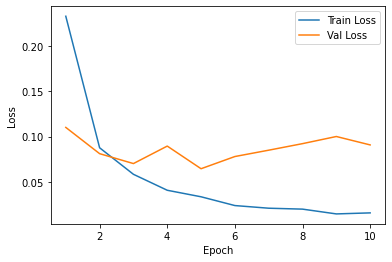

Learning Rate: 1e-09, Epoch [1/10], Train Loss: 2.3030, Val Loss: 2.3025
Learning Rate: 1e-09, Epoch [2/10], Train Loss: 2.3030, Val Loss: 2.3024
Learning Rate: 1e-09, Epoch [3/10], Train Loss: 2.3030, Val Loss: 2.3024
Learning Rate: 1e-09, Epoch [4/10], Train Loss: 2.3030, Val Loss: 2.3024
Learning Rate: 1e-09, Epoch [5/10], Train Loss: 2.3030, Val Loss: 2.3024
Learning Rate: 1e-09, Epoch [6/10], Train Loss: 2.3029, Val Loss: 2.3023
Learning Rate: 1e-09, Epoch [7/10], Train Loss: 2.3029, Val Loss: 2.3023
Learning Rate: 1e-09, Epoch [8/10], Train Loss: 2.3029, Val Loss: 2.3023
Learning Rate: 1e-09, Epoch [9/10], Train Loss: 2.3029, Val Loss: 2.3023
Learning Rate: 1e-09, Epoch [10/10], Train Loss: 2.3028, Val Loss: 2.3023
Learning Rate: 1e-09, Test MSE: 17.5167
Learning Rate: 1e-09, Test RMSE: 4.1853
Learning Rate: 1e-09, Test MAE: 3.3893
Learning Rate: 1e-09, Test MAPE: 338.93%



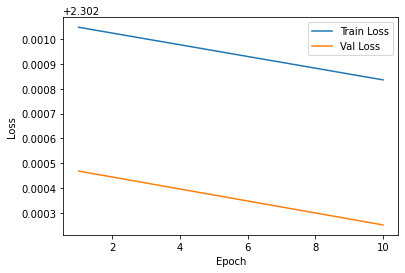

Learning Rate: 1, Epoch [1/10], Train Loss: 804.4117, Val Loss: 2.3454
Learning Rate: 1, Epoch [2/10], Train Loss: 8.2578, Val Loss: 2.4833
Learning Rate: 1, Epoch [3/10], Train Loss: 2.7845, Val Loss: 2.3875
Learning Rate: 1, Epoch [4/10], Train Loss: 2.3615, Val Loss: 2.3573
Learning Rate: 1, Epoch [5/10], Train Loss: 2.3744, Val Loss: 2.3606
Learning Rate: 1, Epoch [6/10], Train Loss: 2.3775, Val Loss: 2.4412
Learning Rate: 1, Epoch [7/10], Train Loss: 2.3746, Val Loss: 2.4022
Learning Rate: 1, Epoch [8/10], Train Loss: 2.3693, Val Loss: 2.3824
Learning Rate: 1, Epoch [9/10], Train Loss: 2.3681, Val Loss: 2.3566
Learning Rate: 1, Epoch [10/10], Train Loss: 2.3759, Val Loss: 2.4004
Learning Rate: 1, Test MSE: 8.5818
Learning Rate: 1, Test RMSE: 2.9295
Learning Rate: 1, Test MAE: 2.5232
Learning Rate: 1, Test MAPE: 252.32%



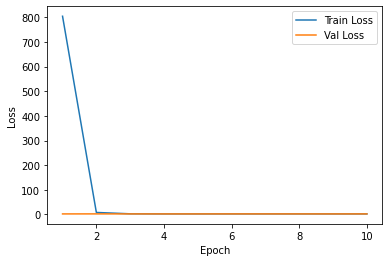

In [117]:
results = []
for lr in learning_rate:
    # Create an instance of the neural network
    model = NN().to(device) #Move tensor to GPU

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images = images.to(device) #Move tensor to GPU
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0) #tensor to python float * number of image in batch
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f'Learning Rate: {lr}, Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Evaluate on the test set
    model.eval()
    mse = nn.MSELoss()
    mae = nn.L1Loss()
    mape = nn.L1Loss()
    total_samples = 0
    with torch.no_grad():
        total_loss = 0.0
        mse_loss = 0.0
        mae_loss = 0.0
        mape_loss = 0.0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            batch_size = images.size(0)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * batch_size
            mse_loss += mse(outputs.argmax(dim=1).float(), labels.float()) * batch_size
            mae_loss += mae(outputs.argmax(dim=1).float(), labels.float()) * batch_size
            mape_loss += mape(outputs.argmax(dim=1).float(), labels.float()) * batch_size
            total_samples += batch_size

        total_loss /= total_samples
        mse_loss /= total_samples
        rmse_loss = torch.sqrt(mse_loss)
        mae_loss /= total_samples
        mape_loss /= total_samples

        result = {
            'learning_rate': lr,
            'test_mse': mse_loss.item(),
            'test_rmse': rmse_loss.item(),
            'test_mae': mae_loss.item(),
            'test_mape': mape_loss.item() * 100
        }
        results.append(result)

        print(f"Learning Rate: {lr}, Test MSE: {mse_loss:.4f}")
        print(f"Learning Rate: {lr}, Test RMSE: {rmse_loss:.4f}")
        print(f"Learning Rate: {lr}, Test MAE: {mae_loss:.4f}")
        print(f"Learning Rate: {lr}, Test MAPE: {mape_loss*100:.2f}%")
        print()
        
        plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
        plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


## Bài 3:
 - Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4



The softmax function uses the exponential function because it has several desirable properties:

- It ensures that the outputs of the function are positive. This is important because probabilities must be positive.
- It ensures that the outputs of the function sum to one. This is important because probabilities must sum to one to represent a valid distribution.
- It is differentiable. This is important because it allows the softmax function to be used in gradient descent to train neural networks.
- The exponential function combined with the normalization in the softmax is that high scores in 𝑥 become much more probable than low scores.